In [1]:
import torch
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
import torch.nn as nn
import numpy as np
import time
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pyDOE import lhs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =6,6
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import CubicSpline
from scipy.integrate import odeint
import tensorflow.compat.v1 as tff
tff.disable_v2_behavior()
np.random.seed(1234)
tff.random.set_random_seed(1234)
import sys
sys.path.insert(0, '../../Utilities/')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import matplotlib.dates as dates
import matplotlib as mpl
from RNN_Sweden import *
import matplotlib.dates as dates

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
##########################################################################################################
# load and Processing of data

df1 = pd.read_csv('world_confirmed.csv')

##########################################################################################################
# process data
today = '07/10/20' # Update this to include more data 
days = pd.date_range(start='03/11/20',end=today)
dd = np.arange(len(days))

total_cases = [df1[day.strftime('%-m/%-d/%y')].sum() for day in days] 
 
row_c=df1['Country_Region'].tolist().index('Sweden')
total_cases = [df1[day.strftime('%-m/%-d/%y')][row_c] for day in days]

t = np.reshape(dd, [-1])
I = np.reshape(total_cases, [-1,1])
nd = 122
cs1 = CubicSpline(t,I)

Td = np.linspace(0,122,nd)

cs_I = cs1(Td)


In [3]:
##define the data
realDat = cs_I

### GRU

In [4]:
batch_size = 32
actual_g, pred_g, train_act_g, train_prd_g, test_act_g, test_prd_g, ep_g, loss_g_train, loss_g_test = run_model(realDat , "Real", 0.0, "GRU", "Sweden", 2000, batch_size)

Sweden outcomes............


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


GRU Train
Epoch 100/2000, Train Loss: 1.976e-05, Time:0.01 seconds
Epoch 200/2000, Train Loss: 2.031e-05, Time:0.01 seconds
Epoch 300/2000, Train Loss: 5.936e-05, Time:0.01 seconds
Epoch 400/2000, Train Loss: 1.705e-05, Time:0.01 seconds
Epoch 500/2000, Train Loss: 1.552e-05, Time:0.01 seconds
Epoch 600/2000, Train Loss: 1.813e-05, Time:0.01 seconds
Epoch 700/2000, Train Loss: 1.603e-05, Time:0.01 seconds
Epoch 800/2000, Train Loss: 3.207e-05, Time:0.01 seconds
Epoch 900/2000, Train Loss: 1.564e-05, Time:0.01 seconds
Epoch 1000/2000, Train Loss: 2.663e-05, Time:0.01 seconds
Epoch 1100/2000, Train Loss: 3.052e-05, Time:0.01 seconds
Epoch 1200/2000, Train Loss: 1.464e-05, Time:0.01 seconds
Epoch 1300/2000, Train Loss: 1.122e-05, Time:0.01 seconds
Epoch 1400/2000, Train Loss: 1.104e-05, Time:0.01 seconds
Epoch 1500/2000, Train Loss: 2.421e-05, Time:0.01 seconds
Epoch 1600/2000, Train Loss: 2.460e-05, Time:0.01 seconds
Epoch 1700/2000, Train Loss: 1.074e-05, Time:0.01 seconds
Epoch 1800/20

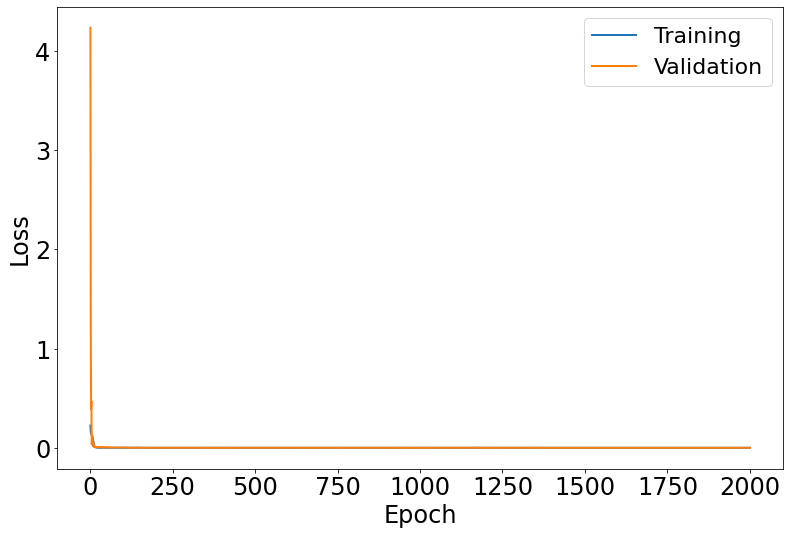

In [5]:
font = 24
fig, ax = plt.subplots() 
ax.plot(ep_g, loss_g_train,  lw=2,label='Training')
ax.plot(ep_g, loss_g_test, lw=2,label ='Validation')
ax.legend(fontsize=22)
ax.tick_params(axis='both', labelsize = 24)
ax.set_xlabel('Epoch', fontsize = font)
ax.set_ylabel('Loss', fontsize = font) 
ax.set_title('Daily Infected',  fontsize = font)
fig.set_size_inches(w=13,h=8.5)
plt.show()

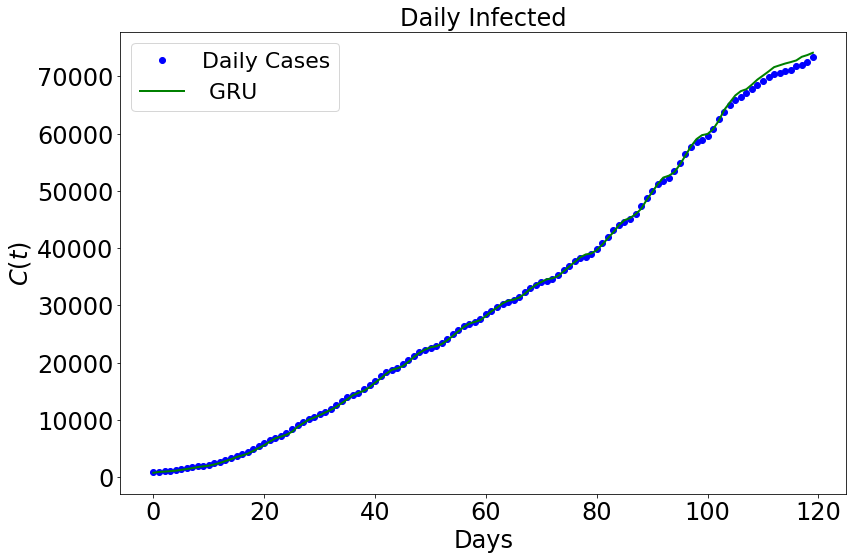

In [6]:
dtrange=np.arange(120)
font = 24
fig, ax = plt.subplots() 
ax.plot(dtrange,realDat[2:] , 'ob',  lw=2,label='Daily Cases')
ax.plot(dtrange, pred_g, "g", lw=2,label =' GRU')
ax.legend(fontsize=22)
ax.tick_params(axis='both', labelsize = 24)
ax.set_xlabel('Days', fontsize = font)
ax.set_ylabel('$C(t)$', fontsize = font) 
ax.set_title('Daily Infected',  fontsize = font)
fig.set_size_inches(w=13,h=8.5)
plt.show()

0
####### GRU bootstrap for IT #######
GRU Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 2.379e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 2.180e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 1.975e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 1.799e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 2.282e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 2.268e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 2.008e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 1.713e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 2.022e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 1.530e-05, Time:0.01 seconds
GRU Total Train Time in seconds 10.063154697418213
1
####### GRU bootstrap for IT #######
GRU Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 3.746e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 2.781e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 2.830e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 3.278e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 6.853e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 3.640e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 2.862e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 4.542e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 2.777e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 2.949e-05, Time:0.01 seconds
GRU Total Train Time in seconds 9.871031045913696
2
####### GRU bootstrap for IT #######
GRU Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 2.648e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 2.206e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 2.402e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 2.728e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 2.290e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 3.209e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 2.081e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 3.976e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 2.059e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 3.168e-05, Time:0.01 seconds
GRU Total Train Time in seconds 10.439310550689697
3
####### GRU bootstrap for IT #######
GRU Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 2.615e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 2.446e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 3.309e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 6.401e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 2.236e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 4.473e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 1.979e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 2.007e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 3.092e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 2.774e-05, Time:0.01 seconds
GRU Total Train Time in seconds 9.974306344985962
4
####### GRU bootstrap for IT #######
GRU Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 2.637e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 2.508e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 2.109e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 2.014e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 1.932e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 2.454e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 2.010e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 3.631e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 1.940e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 1.742e-05, Time:0.01 seconds
GRU Total Train Time in seconds 10.214648008346558
5
####### GRU bootstrap for IT #######
GRU Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 2.907e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 2.609e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 2.549e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 2.326e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 3.297e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 3.555e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 2.988e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 4.602e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 2.319e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 2.279e-05, Time:0.01 seconds
GRU Total Train Time in seconds 9.76615858078003
6
####### GRU bootstrap for IT #######
GRU Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 3.393e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 3.037e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 2.815e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 2.767e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 2.588e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 4.258e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 4.956e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 2.555e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 2.743e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 2.699e-05, Time:0.01 seconds
GRU Total Train Time in seconds 9.916436910629272
7
####### GRU bootstrap for IT #######
GRU Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 2.781e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 2.063e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 2.502e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 2.880e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 4.323e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 2.097e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 2.680e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 2.544e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 2.369e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 2.588e-05, Time:0.01 seconds
GRU Total Train Time in seconds 10.254882335662842
8
####### GRU bootstrap for IT #######
GRU Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 4.242e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 2.959e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 3.457e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 9.284e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 2.433e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 3.055e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 2.137e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 2.218e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 4.319e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 2.776e-05, Time:0.01 seconds
GRU Total Train Time in seconds 10.526573896408081
9
####### GRU bootstrap for IT #######
GRU Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 2.537e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 2.904e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 2.559e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 2.549e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 3.176e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 3.019e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 4.756e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 4.227e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 2.643e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 2.327e-05, Time:0.01 seconds
GRU Total Train Time in seconds 10.3952054977417


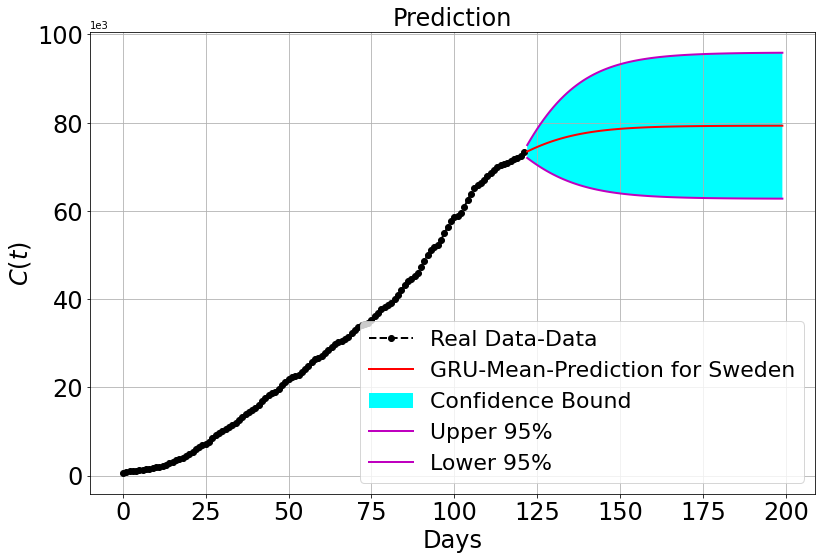

In [7]:
ym = confidence_interval(realDat, 10, "GRU", 'IT', 'Germany', 2 , 'Real Data')

### LSTM

In [8]:
batch_size = 45
actual_l, pred_l, train_act_l, train_prd_l, test_act_l, test_prd_l, ep_l, loss_l_train, loss_l_test =run_model(realDat , "Real", 0.0, "LSTM", "Sweden",  2000, batch_size)

Sweden outcomes............
LSTM Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/2000, Train Loss: 5.494e-05, Time:0.01 seconds
Epoch 200/2000, Train Loss: 2.059e-05, Time:0.01 seconds
Epoch 300/2000, Train Loss: 1.820e-05, Time:0.01 seconds
Epoch 400/2000, Train Loss: 1.705e-05, Time:0.01 seconds
Epoch 500/2000, Train Loss: 1.652e-05, Time:0.01 seconds
Epoch 600/2000, Train Loss: 1.605e-05, Time:0.01 seconds
Epoch 700/2000, Train Loss: 1.319e-05, Time:0.01 seconds
Epoch 800/2000, Train Loss: 1.306e-05, Time:0.01 seconds
Epoch 900/2000, Train Loss: 1.163e-05, Time:0.01 seconds
Epoch 1000/2000, Train Loss: 3.784e-05, Time:0.01 seconds
Epoch 1100/2000, Train Loss: 3.432e-05, Time:0.01 seconds
Epoch 1200/2000, Train Loss: 1.589e-05, Time:0.01 seconds
Epoch 1300/2000, Train Loss: 1.863e-05, Time:0.01 seconds
Epoch 1400/2000, Train Loss: 1.633e-05, Time:0.01 seconds
Epoch 1500/2000, Train Loss: 1.861e-05, Time:0.01 seconds
Epoch 1600/2000, Train Loss: 9.364e-06, Time:0.01 seconds
Epoch 1700/2000, Train Loss: 2.111e-05, Time:0.01 seconds
Epoch 1800/2000, Train 

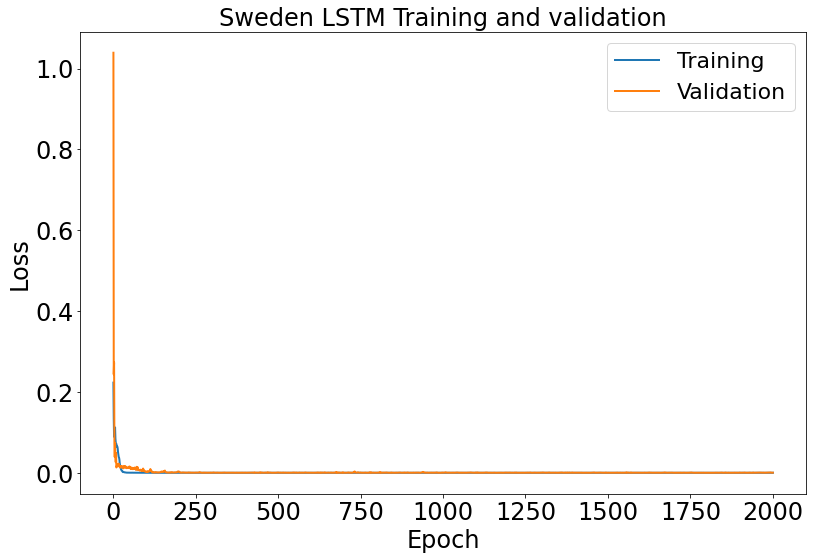

In [9]:
font = 24
fig, ax = plt.subplots() 
ax.plot(ep_l, loss_l_train,  lw=2,label='Training')
ax.plot(ep_l, loss_l_test, lw=2,label ='Validation')
ax.legend(fontsize=22)
ax.tick_params(axis='both', labelsize = 24)
ax.set_xlabel('Epoch', fontsize = font)
ax.set_ylabel('Loss', fontsize = font)
ax.set_title('Daily Infected',  fontsize = font)
ax.set_title('Sweden LSTM Training and validation',  fontsize = font)
fig.set_size_inches(w=13,h=8.5)
plt.show()

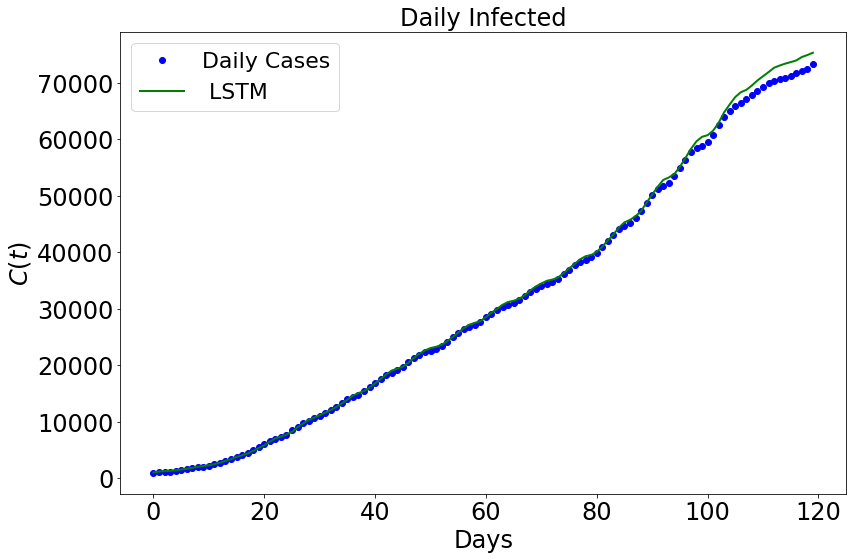

In [10]:
dtrange=np.arange(120)
font = 24
fig, ax = plt.subplots() 
ax.plot(dtrange,realDat[2:] , 'ob',  lw=2,label='Daily Cases')
ax.plot(dtrange, pred_l, "g", lw=2,label =' LSTM')
ax.legend(fontsize=22)
ax.tick_params(axis='both', labelsize = 24)
ax.set_xlabel('Days', fontsize = font)
ax.set_ylabel('$C(t)$', fontsize = font) 
ax.set_title('Daily Infected',  fontsize = font)
fig.set_size_inches(w=13,h=8.5)
plt.show()

0
####### LSTM bootstrap for IT #######
LSTM Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 3.904e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 3.639e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 1.119e-04, Time:0.01 seconds
Epoch 400/1000, Train Loss: 3.216e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 2.963e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 6.248e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 2.677e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 2.866e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 3.161e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 3.019e-05, Time:0.01 seconds
LSTM Total Train Time in seconds 10.544235944747925
1
####### LSTM bootstrap for IT #######
LSTM Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 5.988e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 3.724e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 1.446e-04, Time:0.01 seconds
Epoch 400/1000, Train Loss: 3.530e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 8.586e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 1.405e-04, Time:0.01 seconds
Epoch 700/1000, Train Loss: 8.492e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 1.053e-04, Time:0.01 seconds
Epoch 900/1000, Train Loss: 1.998e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 2.249e-05, Time:0.01 seconds
LSTM Total Train Time in seconds 10.910646915435791
2
####### LSTM bootstrap for IT #######
LSTM Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 6.144e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 4.761e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 4.198e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 5.297e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 9.957e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 8.098e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 5.719e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 2.946e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 8.697e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 8.541e-05, Time:0.01 seconds
LSTM Total Train Time in seconds 10.524652004241943
3
####### LSTM bootstrap for IT #######
LSTM Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 5.022e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 3.686e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 5.193e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 3.197e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 9.515e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 4.769e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 2.892e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 6.406e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 3.638e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 4.242e-05, Time:0.01 seconds
LSTM Total Train Time in seconds 10.488237857818604
4
####### LSTM bootstrap for IT #######
LSTM Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 3.280e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 3.625e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 6.299e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 4.772e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 2.554e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 3.328e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 4.600e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 4.189e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 3.856e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 3.958e-05, Time:0.01 seconds
LSTM Total Train Time in seconds 10.639652729034424
5
####### LSTM bootstrap for IT #######
LSTM Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 8.435e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 4.687e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 4.321e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 6.473e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 4.431e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 3.265e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 4.563e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 3.306e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 3.558e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 2.884e-05, Time:0.01 seconds
LSTM Total Train Time in seconds 10.340993881225586
6
####### LSTM bootstrap for IT #######
LSTM Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 5.553e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 3.571e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 4.103e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 2.604e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 3.778e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 4.990e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 3.438e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 3.770e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 3.785e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 4.284e-05, Time:0.01 seconds
LSTM Total Train Time in seconds 10.63905644416809
7
####### LSTM bootstrap for IT #######
LSTM Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 2.547e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 2.320e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 2.748e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 3.686e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 2.853e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 2.691e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 2.104e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 2.242e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 2.192e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 4.262e-05, Time:0.01 seconds
LSTM Total Train Time in seconds 10.927113056182861
8
####### LSTM bootstrap for IT #######
LSTM Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 3.325e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 2.487e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 3.411e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 2.379e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 3.298e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 2.487e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 1.993e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 2.086e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 1.784e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 1.848e-05, Time:0.01 seconds
LSTM Total Train Time in seconds 10.43820834159851
9
####### LSTM bootstrap for IT #######
LSTM Train


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 100/1000, Train Loss: 3.157e-05, Time:0.01 seconds
Epoch 200/1000, Train Loss: 2.782e-05, Time:0.01 seconds
Epoch 300/1000, Train Loss: 3.682e-05, Time:0.01 seconds
Epoch 400/1000, Train Loss: 3.126e-05, Time:0.01 seconds
Epoch 500/1000, Train Loss: 3.444e-05, Time:0.01 seconds
Epoch 600/1000, Train Loss: 2.066e-05, Time:0.01 seconds
Epoch 700/1000, Train Loss: 3.929e-05, Time:0.01 seconds
Epoch 800/1000, Train Loss: 2.033e-05, Time:0.01 seconds
Epoch 900/1000, Train Loss: 1.918e-05, Time:0.01 seconds
Epoch 1000/1000, Train Loss: 2.118e-05, Time:0.01 seconds
LSTM Total Train Time in seconds 10.39670181274414


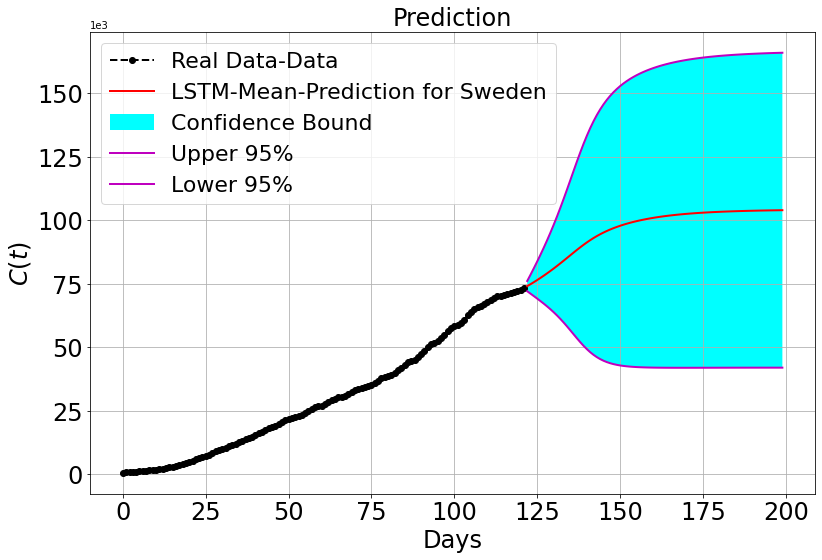

In [11]:
ym = confidence_interval(realDat, 10, "LSTM", 'IT', 'Germany', 10 , 'Real Data')